# Part I - (ProsperLoanDataExploration)
## by (ACHUMBOM HAGGAI AKUMBOM)

## Introduction
> This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate),
current loan status, borrower income, and many others.
This [data dictionary](https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0) explains the variables in the data set.  


## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
loan=pd.read_csv("../Udacity_Data_Anayltic_Project_3-Visualization/prosperLoanData.csv")
loan.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [3]:
# high-level overview of data shape and composition
print(loan.shape)
print(loan.dtypes)
print(loan.head(4))

(113937, 81)
ListingKey                      object
ListingNumber                    int64
ListingCreationDate             object
CreditGrade                     object
Term                             int64
                                ...   
PercentFunded                  float64
Recommendations                  int64
InvestmentFromFriendsCount       int64
InvestmentFromFriendsAmount    float64
Investors                        int64
Length: 81, dtype: object
                ListingKey  ListingNumber            ListingCreationDate  \
0  1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1  10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
2  0EE9337825851032864889A          81716  2007-01-05 15:00:47.090000000   
3  0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   

  CreditGrade  Term LoanStatus           ClosedDate  BorrowerAPR  \
0           C    36  Completed  2009-08-14 00:00:00      0.16516   
1         NaN  

In [4]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [5]:
#Make a copy of the data frame
loans_clean =loan.copy()

In [6]:
#Adjust Datetime columns of colunmns 'ListingCreationDate','ClosedDate','LoanOriginationDate','DateCreditPulled'

# creating a list of the date columns that needs the data type changed
date_columns = ['ListingCreationDate','ClosedDate','LoanOriginationDate','DateCreditPulled']

# using a for loop to change the columns data type
for col in date_columns:
    loan[col] = pd.to_datetime(loan[col])

In [7]:
loans_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [8]:
loans_clean.drop_duplicates(inplace=True)

In [9]:
# descriptive statistics for numeric variables
loans_clean.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [10]:
# Columns needed for my visualizations
columns = ['LoanKey', 'Term', 'LoanStatus','BorrowerAPR', 'BorrowerRate', 'ListingCategory (numeric)', 
           'BorrowerState', 'Occupation', 'EmploymentStatus', 'LoanOriginalAmount', 'CreditScoreRangeLower',
           'CreditScoreRangeUpper', 'DebtToIncomeRatio', 'Investors', 'StatedMonthlyIncome', 'MonthlyLoanPayment', 
           'IncomeVerifiable', 'ProsperScore','ProsperRating (Alpha)']

loans_clean = loans_clean[columns]
loans_clean.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 113937 entries, 0 to 113936
Data columns (total 19 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   LoanKey                    113937 non-null  object 
 1   Term                       113937 non-null  int64  
 2   LoanStatus                 113937 non-null  object 
 3   BorrowerAPR                113912 non-null  float64
 4   BorrowerRate               113937 non-null  float64
 5   ListingCategory (numeric)  113937 non-null  int64  
 6   BorrowerState              108422 non-null  object 
 7   Occupation                 110349 non-null  object 
 8   EmploymentStatus           111682 non-null  object 
 9   LoanOriginalAmount         113937 non-null  int64  
 10  CreditScoreRangeLower      113346 non-null  float64
 11  CreditScoreRangeUpper      113346 non-null  float64
 12  DebtToIncomeRatio          105383 non-null  float64
 13  Investors                  11

In [11]:
# Check dataframe for duplicated values
loans_clean.duplicated().sum()

0

In [12]:
loans_clean.shape

(113937, 19)

In [13]:
loans_clean.head()

,LoanKey,Term,LoanStatus,BorrowerAPR,BorrowerRate,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,LoanOriginalAmount,CreditScoreRangeLower,CreditScoreRangeUpper,DebtToIncomeRatio,Investors,StatedMonthlyIncome,MonthlyLoanPayment,IncomeVerifiable,ProsperScore,ProsperRating (Alpha)
0,E33A3400205839220442E84,36,Completed,0.16516,0.1580,0,CO,Other,Self-employed,9425,640.0,659.0,0.17,258,3083.333333,330.43,True,NaN,NaN
1,9E3B37071505919926B1D82,36,Current,0.12016,0.0920,2,CO,Professional,Employed,10000,680.0,699.0,0.18,1,6125.000000,318.93,True,7.0,A
2,6954337960046817851BCB2,36,Completed,0.28269,0.2750,0,GA,Other,Not available,3001,480.0,499.0,0.06,41,2083.333333,123.32,True,NaN,NaN
3,A0393664465886295619C51,36,Current,0.12528,0.0974,16,GA,Skilled Labor,Employed,10000,800.0,819.0,0.15,158,2875.000000,321.45,True,9.0,A
4,A180369302188889200689E,36,Current,0.24614,0.2085,2,MN,Executive,Employed,15000,680.0,699.0,0.26,20,9583.333333,563.97,True,4.0,D


### What is the structure of your dataset?

The dataset contains 1113066 loans with 19 features (including LoanOriginalAmount, BorrowerAPR, StatedMonthlyIncome, Term, ProsperRating (Alpha), EmploymentStatus and many others)

### What is/are the main feature(s) of interest in your dataset?

I'm most interested in figuring what factors affect a loan’s outcome status

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect the `StatedMonthlyIncome`, `	LoanOriginalAmount`, `MonthlyLoanPayment`,`Term`,`BorrowerAPR`,	`BorrowerRate` should have a the strongest effect on `LoanStatus`.

In [14]:
#In Order to  Stop repeated codes we can automate some parts of our codes such as the title and lables going forward
def plot_title(title,x_label,y_label,xticks):
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.xticks(rotation=90)

## Univariate Exploration

#### Question1: Let's Check the Distribution of  Loan Status through out the data set?

In [15]:
# Loan Status distribution
loan_count = loans_clean.LoanStatus.value_counts()
loan_count[0:5]

Current                 56576
Completed               38074
Chargedoff              11992
Defaulted                5018
Past Due (1-15 days)      806
Name: LoanStatus, dtype: int64

In [16]:
# Set default color from color palette
base_color = sns.color_palette()[0]

#### Visualization

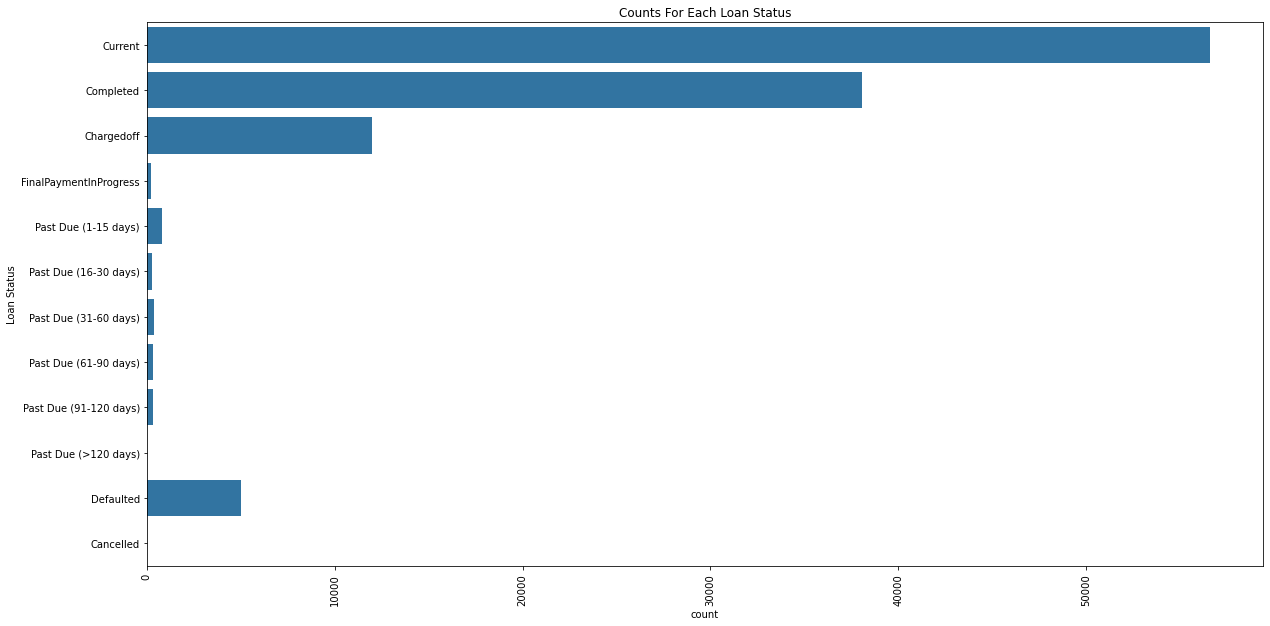

In [17]:
# Using Countplot for distribution
plt.figure(figsize = [20, 10])
data_order = ['Current','Completed','Chargedoff','FinalPaymentInProgress','Past Due (1-15 days)','Past Due (16-30 days)','Past Due (31-60 days)','Past Due (61-90 days)','Past Due (91-120 days)','Past Due (>120 days)','Defaulted','Cancelled']
sns.countplot(data = loans_clean, y = 'LoanStatus', color = base_color, order = data_order)
plot_title('Counts For Each Loan Status','count','Loan Status','')
plt.show()

#### Observations: 
I Noticed that alot of the **Current** state has the highest frequency 

#### Question2: Let's Check the Distribution of  Loan Terms through out the data set?

In [18]:
#Let's Check  Loan Term Distribution
counts = loans_clean.Term.value_counts()
counts

36    87778
60    24545
12     1614
Name: Term, dtype: int64

#### Visualization

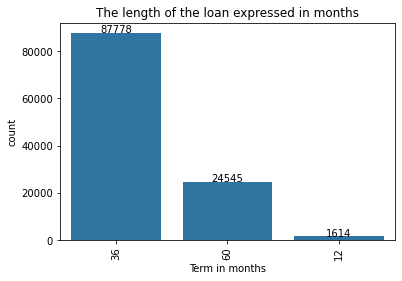

In [19]:
# Adding counts of each term in our data on top of of each bar.
for i in range (loans_clean.Term.value_counts().shape[0]):
    count = loans_clean.Term.value_counts().values[i]
    plt.text(i, count+3500, count, ha = 'center', va='top')
    
    #Using Barplot for this distribution
term_order = loans_clean.Term.value_counts().index
sns.countplot(x='Term', data = loans_clean, color = base_color, order = term_order)
plot_title('The length of the loan expressed in months','Term in months','count','')
plt.show()

#### Observations: 
From the above plot we can see that **majority of the People Opted for a 36 months plan**

#### Question3: How many borrower have verifiable Income source?

#### Visualization

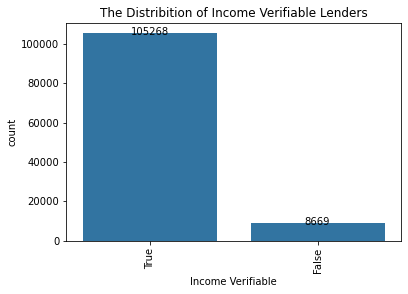

In [20]:
# Adding counts of each term in our data on top of of each bar.
for i in range (loans_clean.IncomeVerifiable.value_counts().shape[0]):
    count = loans_clean.IncomeVerifiable.value_counts().values[i]
    plt.text(i, count+3500, count, ha = 'center', va='top')
#Using Barplot for this distribution
term_order = loans_clean.IncomeVerifiable.value_counts().index
sns.countplot(x='IncomeVerifiable', data = loans_clean, color = base_color, order = term_order)
plot_title('The Distribition of Income Verifiable Lenders','Income Verifiable','count','')
plt.show()

#### Observations:
105268 lenders have an `Income verifiable`  Source

#### Question3: How is Borrower APR Distributed through out  the data set?

#### Visualization

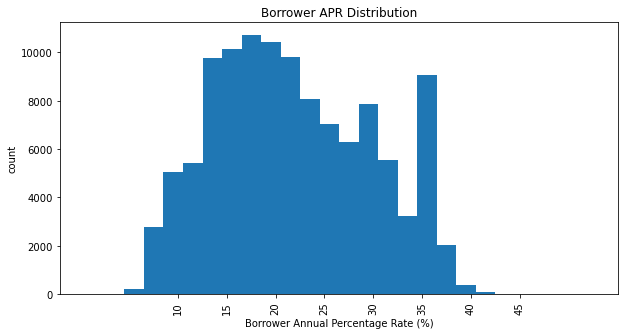

In [21]:
# Borrower APR Distribution
binsize = 2
borroweAPRPct = loans_clean['BorrowerAPR']*100
bins = np.arange(0.5, loans_clean['BorrowerAPR'].max()*100+binsize, binsize)

plt.figure(figsize=[10, 5])
plt.hist(x = borroweAPRPct, bins = bins)
plt.xticks([10, 15, 20, 25, 30, 35, 40, 45], ['10', '15', '20', '25', '30', '35', '40', '45'])
plot_title('Borrower APR Distribution','Borrower Annual Percentage Rate (%)','count','')
plt.show()

#### Observations:
The maximum APR for borrowers is in the range of 15% to about 20% percent. This could imply that many loans have average percentage rates of between 15% and 20%.

#### Question4: How is Borrower Rate Distributed through out  the data set?

#### Visualization

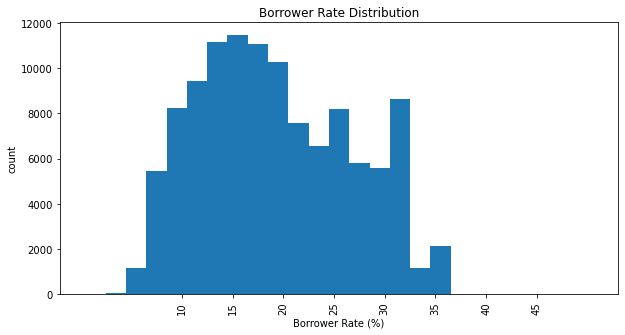

In [22]:
# Borrower Rate Distribution
binsize = 2
borroweRatect = loans_clean['BorrowerRate']*100
bins = np.arange(0.5, loans_clean['BorrowerRate'].max()*100+binsize, binsize)

plt.figure(figsize=[10, 5])
plt.hist(x = borroweRatect, bins = bins)
plt.xticks([10, 15, 20, 25, 30, 35, 40, 45], ['10', '15', '20', '25', '30', '35', '40', '45'])
plot_title('Borrower Rate Distribution','Borrower Rate (%)','count','')
plt.show()

#### Observations:
We notice that this distrubition is rightskewed 

#### Question5: How is Loan Original Amount Distributed through out  the data set?

#### Visualization

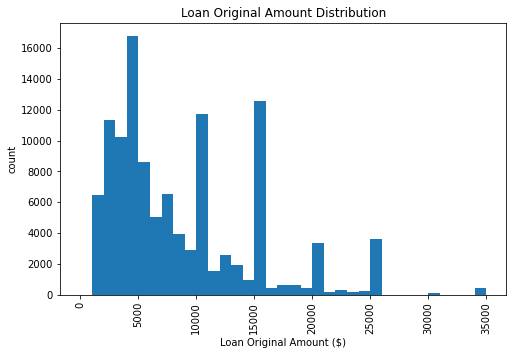

In [23]:
# Loan Original Amount Distribution
binsize = 1000
bins = np.arange(0,loans_clean['LoanOriginalAmount'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = loans_clean, x = 'LoanOriginalAmount', bins = bins)
plot_title('Loan Original Amount Distribution','Loan Original Amount ($)','count','')
plt.show()

#### Observations:
This plot is rightskewed let's introduce the log scale

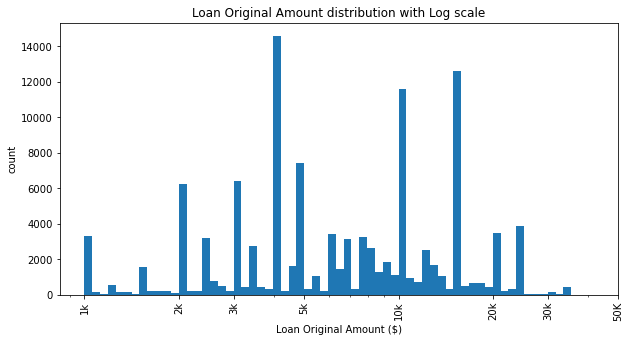

In [24]:
#Putting it in a log-scale
log_binsize = 0.025
bins = 10 ** np.arange(3, np.log10(loans_clean['LoanOriginalAmount'].max())+log_binsize, log_binsize)

plt.figure(figsize=[10, 5])
plt.hist(data = loans_clean, x = 'LoanOriginalAmount', bins = bins)
plt.xscale('log')
plt.xticks([1e3, 2e3, 3e3, 5e3, 1e4, 2e4, 3e4, 5e4], ['1k', '2k','3k', '5k', '10k', '20k', '30k', '50K'])
plot_title('Loan Original Amount distribution with Log scale','Loan Original Amount ($)','count','')
plt.show()

#### Observations: 
The Highest peaks are between 3,000 and 20,000

#### Question6: How is Monthly loan payment distributed through out  the data set?

#### Visualization

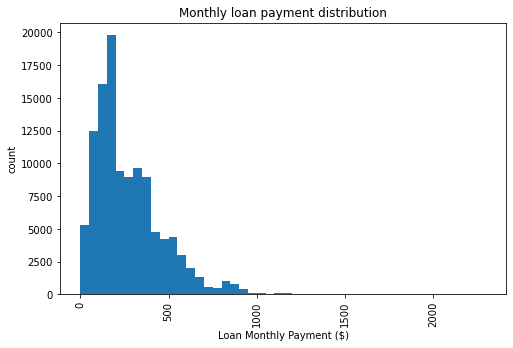

In [25]:
# Monthly loan payment distribution
binsize = 50
bins = np.arange(0, loans_clean['MonthlyLoanPayment'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = loans_clean, x = 'MonthlyLoanPayment', bins = bins)
plot_title('Monthly loan payment distribution','Loan Monthly Payment ($)','count','')
plt.show()

#### Observations: 
There's a long tail in the distribution, so let's put it on a log scale 

#### Visualization

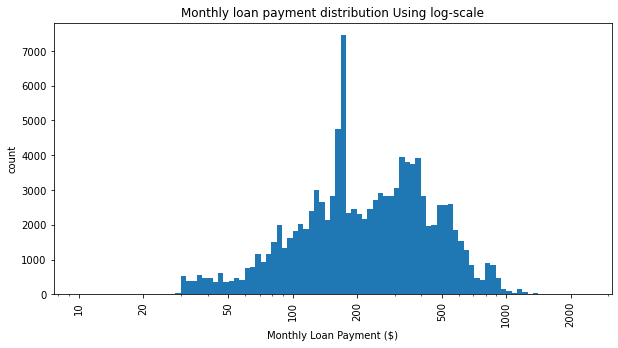

In [26]:
# Using log-scale
log_binsize = 0.025
bins = 10 ** np.arange(1, np.log10(loans_clean['MonthlyLoanPayment'].max())+log_binsize, log_binsize)

plt.figure(figsize=[10, 5])
plt.hist(data = loans_clean, x = 'MonthlyLoanPayment', bins = bins)
plt.xscale('log')
plt.xticks([10, 20, 50, 100, 200, 500, 1e3, 2e3], ['10', '20','50', '100', '200', '500', '1000', '2000'])
plot_title('Monthly loan payment distribution Using log-scale','Monthly Loan Payment ($)','count','')
plt.show()

#### Observations: 
We noticed that alot of people pay between 100 to about $500 monthly for 
the loans they took

#### Question7: How is Stated Monthly income distributed through out  the data set?

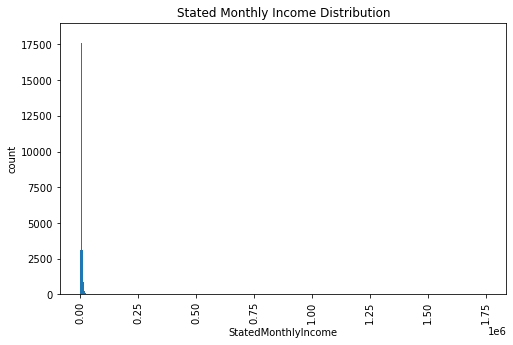

In [27]:
# Stated Monthly income distribution
binsize = 1000
bins = np.arange(0, loans_clean['StatedMonthlyIncome'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = loans_clean, x = 'StatedMonthlyIncome', bins = bins)
plot_title('Stated Monthly Income Distribution','StatedMonthlyIncome','count','')
plt.show()

#### Observations: 
The plot is highly skewed and they are alot of outliers as well
so we have to  use a log scale and exclude the outliers for better visualization 

#### Visualization

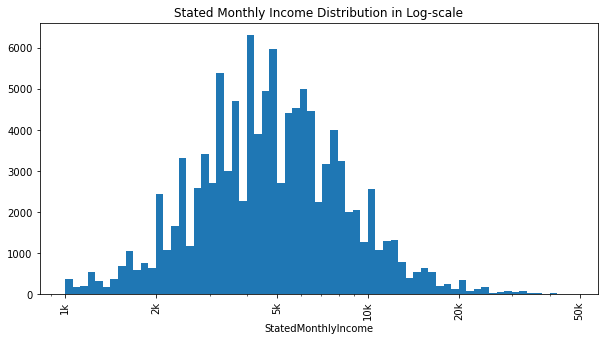

In [28]:
# Using log-scale
#In addition, truncate the X axis to show only values less than 50k which are the majority of data
log_binsize = 0.025
bins = 10 ** np.arange(3, 4.7, log_binsize)

plt.figure(figsize=[10, 5])
plt.hist(data = loans_clean, x = 'StatedMonthlyIncome', bins = bins)
plt.xscale('log')
plt.xticks([1e3, 2e3, 5e3, 1e4, 2e4, 5e4], ['1k', '2k','5k', '10k', '20k', '50k'])
plot_title('Stated Monthly Income Distribution in Log-scale','StatedMonthlyIncome','','')
plt.show()

#### Observations: 
Here we noticed that alot of people earn **between 2000 to 10000 dollars 
monthly** with about 6000 people earning 5000 dollars a each month

#### Question8: How is Debt to Income Ration Distribution with log scale and truncate to values less than 1.8

#### Visualization

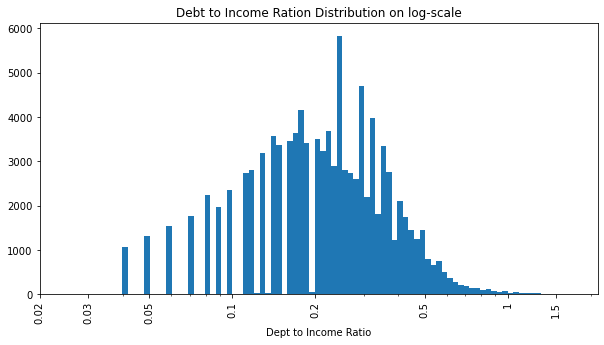

In [29]:
log_binsize = 0.02
bins = 10 ** np.arange(-1.5, 0.25, log_binsize)
plt.figure(figsize=[10, 5])
plt.hist(data = loans_clean, x = 'DebtToIncomeRatio', bins = bins)
plt.xscale('log')
plt.xticks([2e-2, 3e-2, 5e-2, 1e-1, 2e-1, 5e-1, 1, 1.5], ['0.02','0.03', '0.05', '0.1', '0.2', '0.5', '1', '1.5'])
plot_title('Debt to Income Ration Distribution on log-scale','Dept to Income Ratio','','')
plt.show()

#### Observations: 
We see noticed that the debt to income ratio is normally distrubited around 0.2  

#### Question9: Which states have the highest borrowing count?

#### Visualization

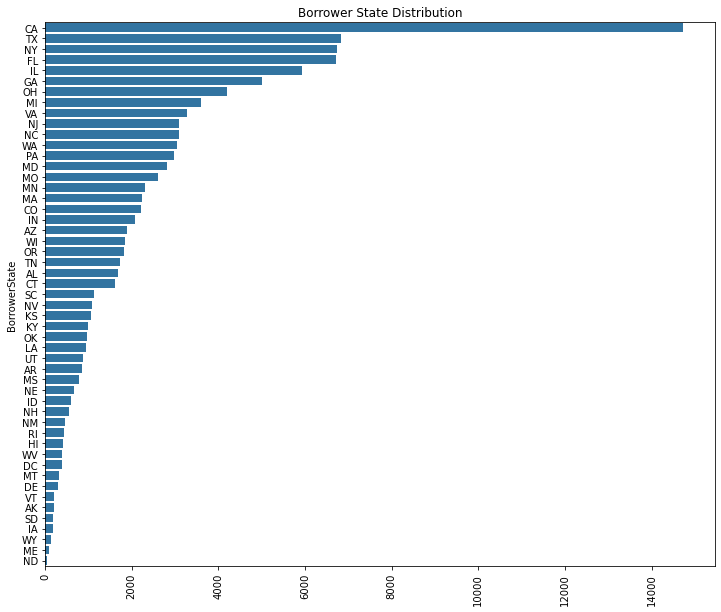

In [30]:
freq = loans_clean['BorrowerState'].value_counts()

# Get the indexes of the Series
borrow_order = freq.index

plt.figure(figsize=(12,10))
sns.countplot(y='BorrowerState',data=loans_clean, color = base_color,order = borrow_order)
plot_title('Borrower State Distribution','','BorrowerState','')
plt.show()

#### Observations: 
We noticed that `CA` California has the higest borrwer count of about 14000

#### Question 10: What is the distribution of EmploymentStatus through the data set ?

In [31]:
#let's first get the counts
loans_clean.EmploymentStatus.value_counts()

Employed         67322
Full-time        26355
Self-employed     6134
Not available     5347
Other             3806
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64

#### Visualization

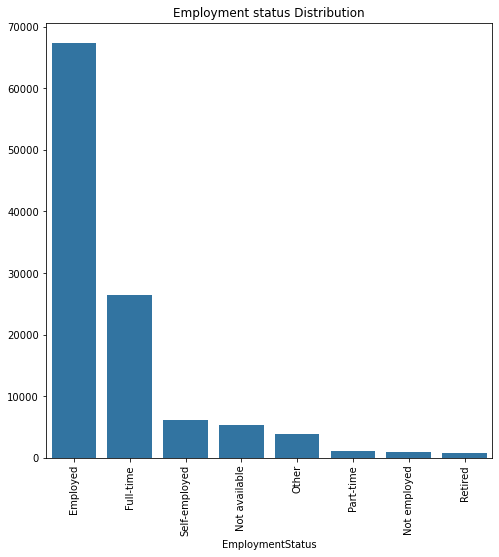

In [32]:
plt.figure(figsize=(8,8))
data_order = loans_clean.EmploymentStatus.value_counts().index
sns.countplot(x='EmploymentStatus',data= loans_clean,color=base_color,order = data_order)
plot_title('Employment status Distribution','EmploymentStatus','','rotation=90')
plt.show()

#### Observations: 
Borwers where mostly people who where employed, also we had the unemployed and the Retired Individuals

#### Question 11: How is Prosper Rating distributed  through out the data set ?

#### Visualization

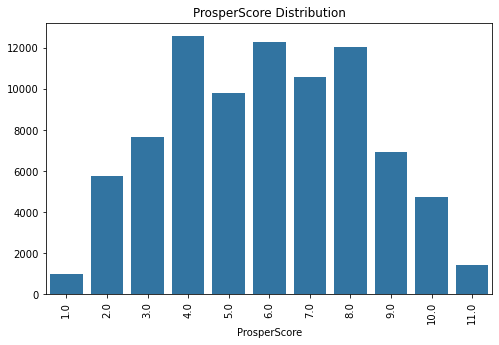

In [33]:
# Prosper Rating Distribution

plt.figure(figsize=[8, 5])
sns.countplot(data=loans_clean,x='ProsperScore',color=base_color);
plot_title('ProsperScore Distribution','ProsperScore','','')
plt.show()

#### Observations: 
Most People get a **`ProsperScore`** of `4.0` and the most frequent `ProsperScore` are `4.0`,`6.0`and `8.0`

## Bivariate Exploration

> To start off with, I want to look at the pairwise correlations present between features in the data.

#### Question 12: What is the Relation ship with numeric and Categorical Variables?

In [34]:
numeric_vars = ['LoanOriginalAmount', 'DebtToIncomeRatio', 'StatedMonthlyIncome', 'MonthlyLoanPayment']
categoric_vars = ['ProsperRating (Alpha)', 'LoanStatus']
order = data_order

#### Visualization

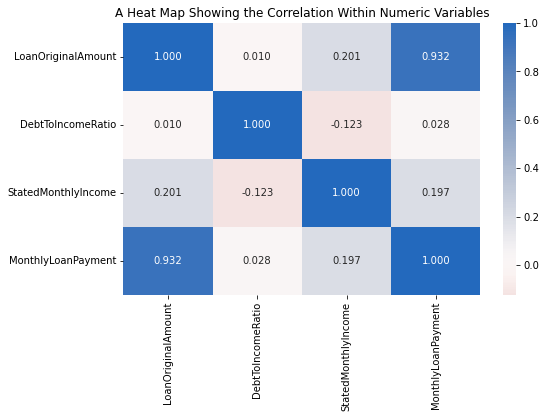

In [35]:
# correlation plot
plt.figure(figsize = [8, 5])
sns.heatmap(loans_clean[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plot_title('A Heat Map Showing the Correlation Within Numeric Variables','','','')
plt.show()

Let's verify the plot with a Grid Pair plot

loans_clean.shape= (113937, 19)
loans_clean.shape= (500, 19)


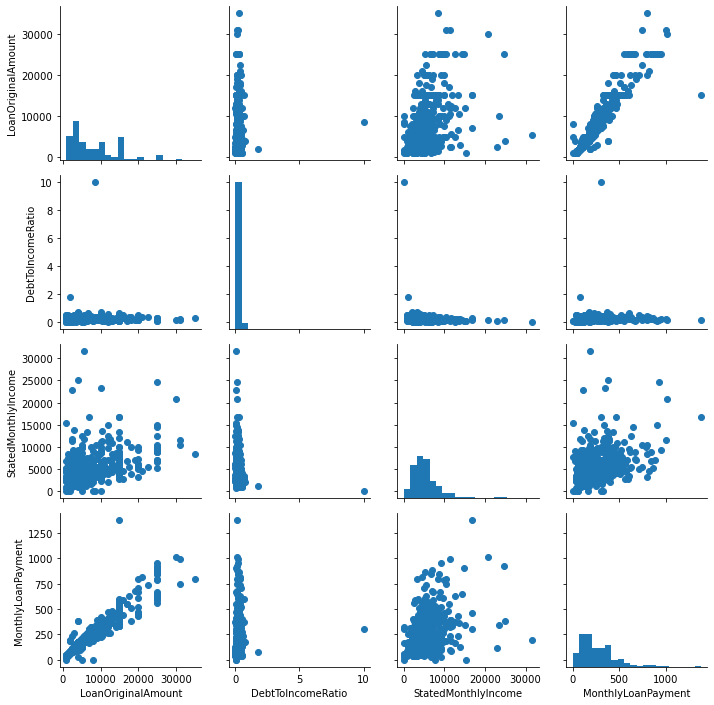

In [36]:
# plot matrix: sample 500 diamonds so that plots are clearer and they render faster
print("loans_clean.shape=",loans_clean.shape)
loans_clean = loans_clean.sample(n=500, replace = False)
print("loans_clean.shape=",loans_clean.shape)

g = sns.PairGrid(data = loans_clean, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter);

#### Observations: 
There's a High Positive coralation between LoanOriginalAmount and MonthlyLoanPayment and a a negative corolation between Stated Monthly Income and Debt to Income Ratio

#### Question 13: What is the relationship between the  LoanOriginalAmount and MonthlyLoanPayment?

#### Visualization

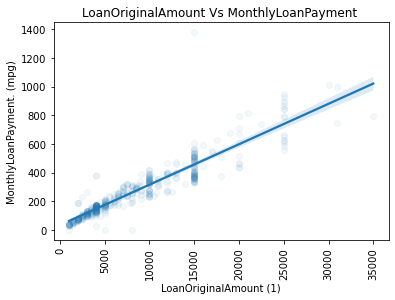

In [37]:
#Let's Check the relationship between the  LoanOriginalAmount and MonthlyLoanPayment
# Scatter plot
sns.regplot(data = loans_clean, x = 'LoanOriginalAmount', y = 'MonthlyLoanPayment', scatter_kws={'alpha':1/20});
plot_title('LoanOriginalAmount Vs MonthlyLoanPayment ','LoanOriginalAmount (1)','MonthlyLoanPayment. (mpg)','')
plt.show()

#### Observations: 
This Plot Suggest a possitive corolation between Loan Original Amount and Monthly Loan Payment impling that those with high loan amount payed high sums of money monthly

#### Question 14: What is the relationship between relationship between EmploymentStatus and Income Verifiable

#### Visualization

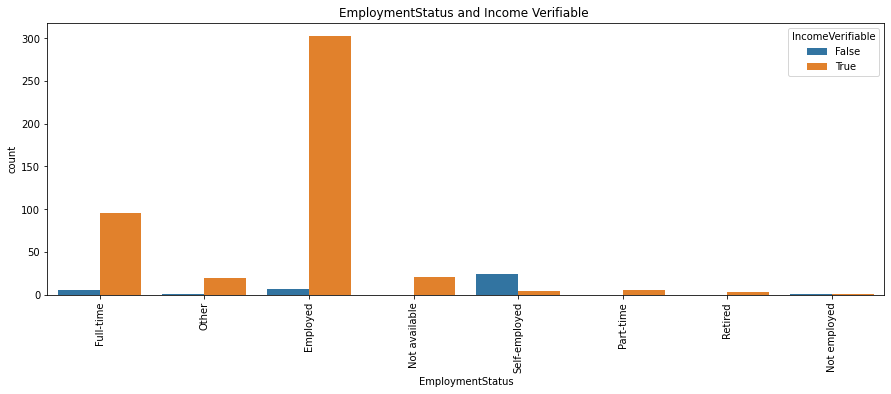

In [38]:
#Let's Check the relationship between EmploymentStatus and Income Verifiable
plt.figure(figsize = [15, 5])
sns.countplot(data = loans_clean, x = 'EmploymentStatus', hue = 'IncomeVerifiable')
plot_title('EmploymentStatus and Income Verifiable ','EmploymentStatus','count','')
plt.show()

#### Observations: 
We see that we have more Employed and Full time Employed Individuals with a Verifable source of income 

#### Question 14: how does EmploymentStatus affect  theLoanStatus

#### Visualization

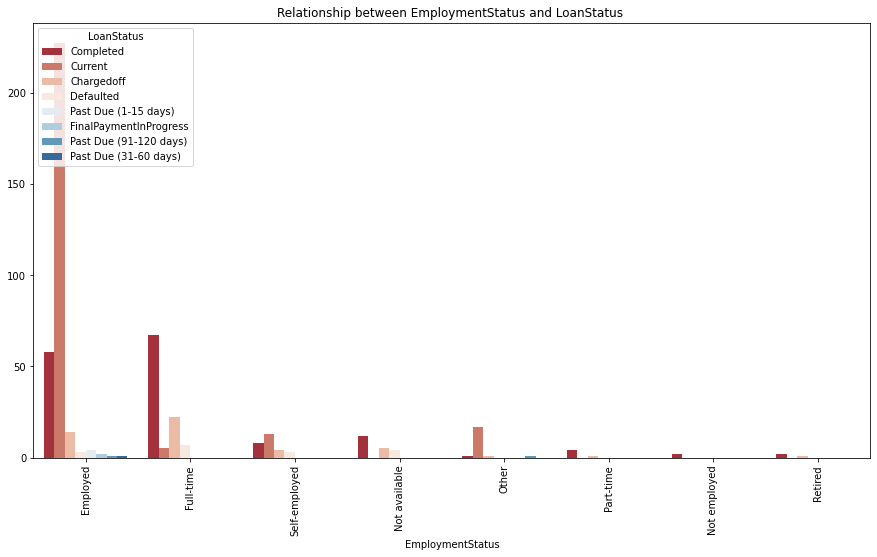

In [39]:
#Let's Check the Relationship between EmploymentStatus and LoanStatus
plt.figure(figsize = [15, 8])
sns.countplot(data = loans_clean, x = 'EmploymentStatus', hue = 'LoanStatus',palette='RdBu', order = data_order)
plot_title('Relationship between EmploymentStatus and LoanStatus ','EmploymentStatus','','')
plt.show();

#### Observations: 
We can see here that Full time Employee's have a Loan status of complete 
mean while employee with the status of employed have a loan status of current we see that there's no relationship between `EmploymentStatus` and `LoanStatus`

#### Question 15: how does EmploymentStatus affect  the ProsperScore ?

#### Visualization

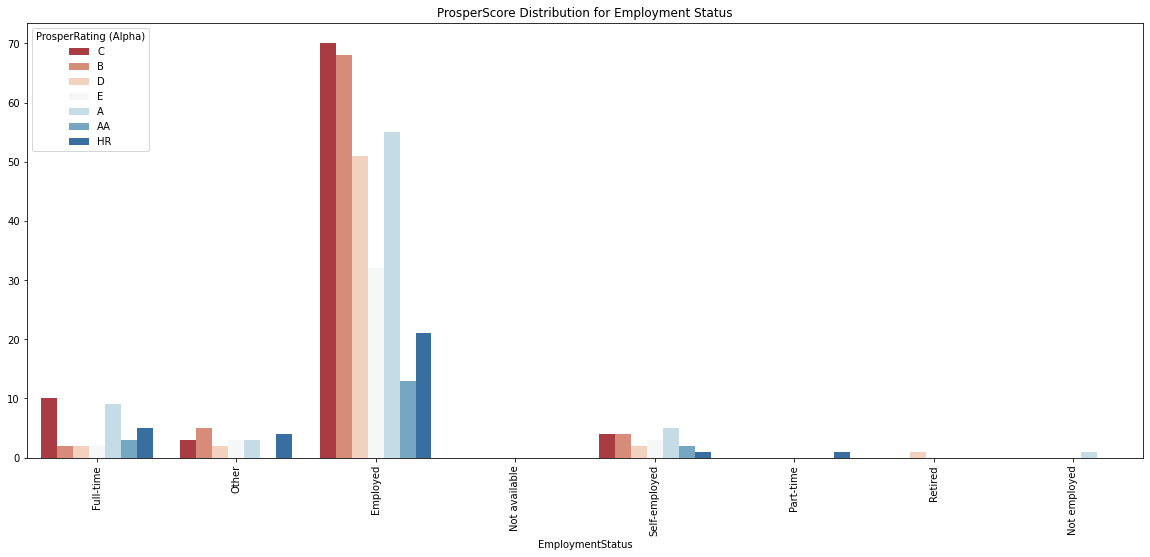

In [40]:
plt.figure(figsize = [20, 8])
sns.countplot(data = loans_clean, x = 'EmploymentStatus', hue = 'ProsperRating (Alpha)', palette='RdBu')
plot_title('ProsperScore Distribution for Employment Status','EmploymentStatus','','')
plt.show();

#### Observations: 
Intrestingly we noticed that we have a high count of Employed persons with a `ProsperRating (Alpha)` of HR which means High Risk and also we see that Retired Individual all have a `ProsperRating (Alpha)`

#### Question 16: how does Term affect the BorrowerRate ?

#### Visualization

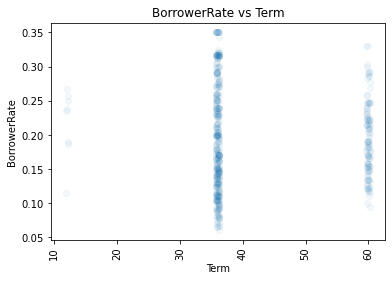

In [41]:
#Let's Check the relationship between BorrowerRate and Term
sns.regplot(data=loans_clean, x='Term',y='BorrowerRate',x_jitter = 0.3,
            scatter_kws={'alpha' : 1/20}, fit_reg = False);
plot_title('BorrowerRate vs Term','Term','BorrowerRate','')
plt.show();

#### Observations: 
We see that those with Monthly Loan Length of 36 had higher Borrower Rate 

#### Question 17: How does BorrowerRate affect Loan Status ?

#### Visualization

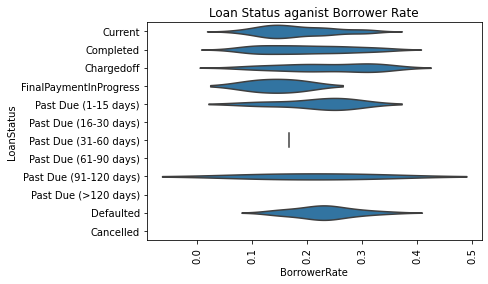

In [42]:
#Let's Plot Loan Status aganist Borrower Rate
base_color = sns.color_palette()[0] 
data_order = ['Current','Completed','Chargedoff','FinalPaymentInProgress','Past Due (1-15 days)','Past Due (16-30 days)','Past Due (31-60 days)','Past Due (61-90 days)','Past Due (91-120 days)','Past Due (>120 days)','Defaulted','Cancelled']
sns.violinplot(data=loans_clean, y='LoanStatus', x='BorrowerRate', color=base_color,order = data_order, inner=None)
plot_title('Loan Status aganist Borrower Rate','BorrowerRate','LoanStatus','')
plt.show();

#### Observations: 
We see here that we have moreLoans Status with Defaulted Payment that  have a Higher BorrowerRates than those with Completed, Current or Charged Off Status

#### Question 18: How does Term  affect Loan Status ?

#### Visualization

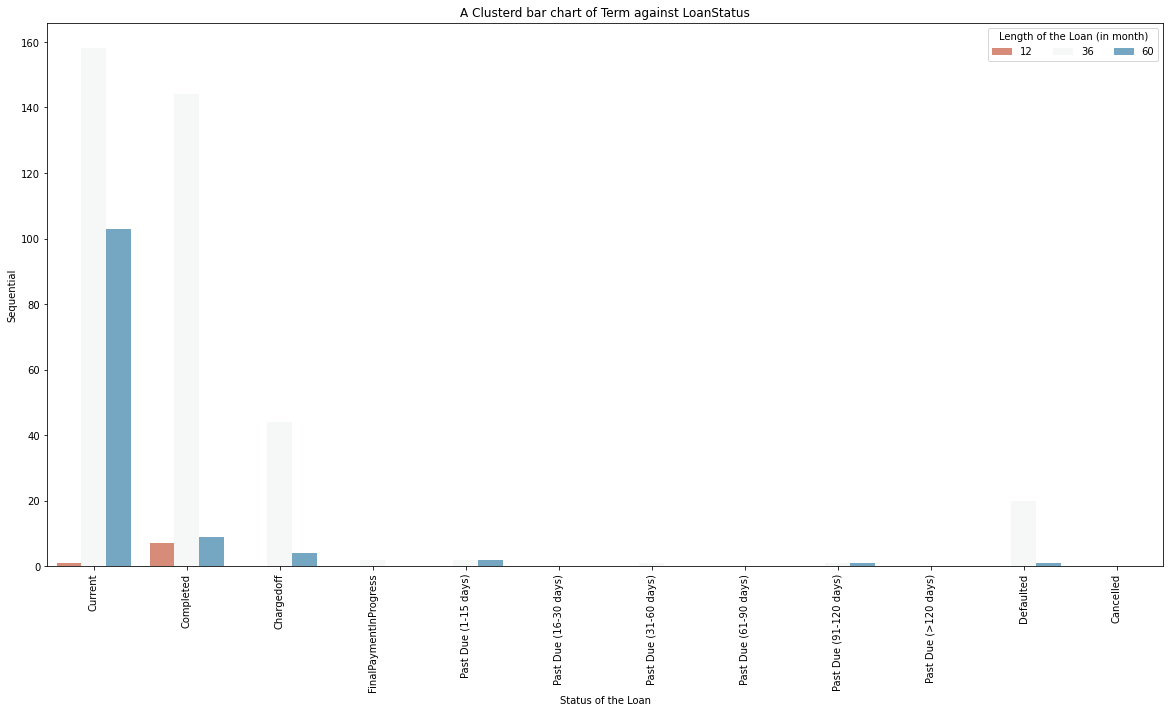

In [43]:
#A Clusterd bar chart of Term against LoanStatus
plt.figure(figsize = [20,10])
data_order = ['Current','Completed','Chargedoff','FinalPaymentInProgress','Past Due (1-15 days)','Past Due (16-30 days)','Past Due (31-60 days)','Past Due (61-90 days)','Past Due (91-120 days)','Past Due (>120 days)','Defaulted','Cancelled']
ax = sns.countplot(data = loans_clean, x = 'LoanStatus', hue = 'Term', palette = "RdBu", order = data_order)
plt.legend(loc = 1, ncol = 3, title = 'Length of the Loan (in month)')
plot_title('A Clusterd bar chart of Term against LoanStatus','Status of the Loan','Sequential','')
plt.show();

#### Observations: 
We noticed that the `Term` does'nt seem to have and impact on the `Loan Status`

#### Question 19: Do Peopel with a Verified Source of Income have a better loan status?

In [44]:
#Plotting  IncomeVerifiable against LoanStatus with help of a heat map

# In the first step I need to reshape the data to
ct_counts = loans_clean.groupby(['LoanStatus', 'IncomeVerifiable']).size()
ct_counts = ct_counts.reset_index(name = 'count')
ct_counts = ct_counts.pivot(index = 'LoanStatus', columns = 'IncomeVerifiable', values = 'count')
ct_counts

IncomeVerifiable,False,True
LoanStatus,,
Chargedoff,6.0,42.0
Completed,12.0,148.0
Current,16.0,246.0
Defaulted,3.0,18.0
FinalPaymentInProgress,1.0,1.0
Past Due (1-15 days),NaN,4.0
Past Due (31-60 days),NaN,1.0
Past Due (91-120 days),NaN,2.0


#### Visualization

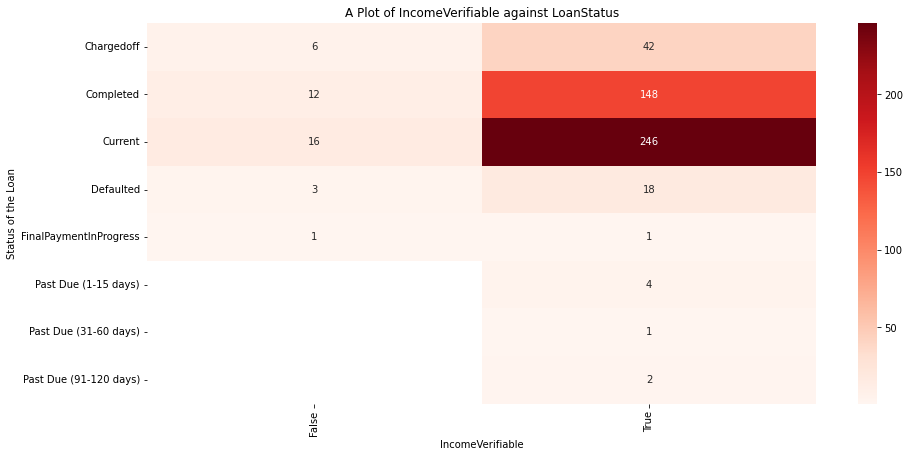

In [45]:
#Plotting IncomeVerifiable against LoanStatus with help of a heat map
plt.figure(figsize = [15,7])
mask = ct_counts.isnull()
sns.heatmap(ct_counts, annot = True, fmt = '.0f', cmap = 'Reds',mask = mask)
plot_title('A Plot of IncomeVerifiable against LoanStatus','IncomeVerifiable','Status of the Loan','')
plt.show();

#### Observations: 
We noticed that alot of  Lenders with Verifiable Income sourced ended up either Charging off , Completing are Currently on a Loan this tells us that the Income Verifiable Affects the Loan  Status

## Multivariate Exploration

#### Question 20: What is the relationship between StatedMonthlyIncome, ProsperScore,BorrowerAPR and LoanOriginalAmount ?

#### Visualization

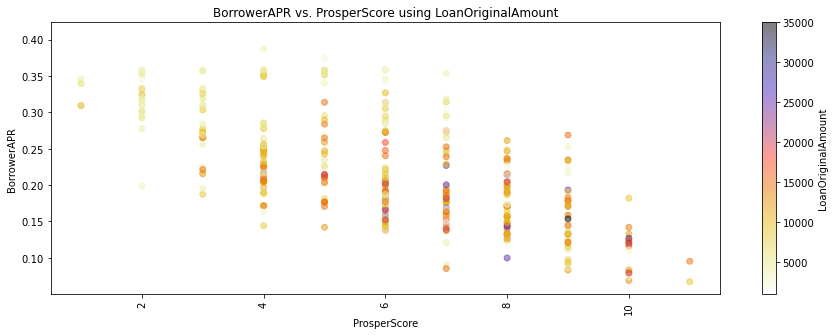

In [46]:
# BorrowerAPR vs. CreditScoreRangeUpper & CreditScoreRangeUpper
plt.figure(figsize = [15, 5]) 
cm = plt.cm.get_cmap('CMRmap_r')
plt.scatter(data=loans_clean[loans_clean['StatedMonthlyIncome']<20000],x='ProsperScore',
            y='BorrowerAPR',c='LoanOriginalAmount',cmap=cm ,alpha=1/2 ) 
plt.colorbar(label = 'LoanOriginalAmount')
plot_title('BorrowerAPR vs. ProsperScore using LoanOriginalAmount','ProsperScore','BorrowerAPR','')
plt.show();

#### Observations: 
We noticed that loans with higher amounts (>$15,000) are mostly taken by people with higher prosper score (6 and above)

#### Question 20: Does the BorrowerAPR and  StatedMonthlyIncome affect the LoanStatus ?

#### Visualization

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


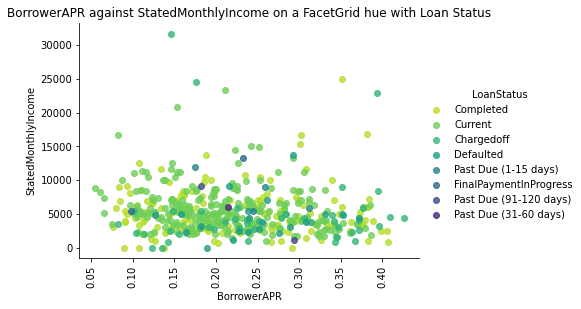

In [47]:
## BorrowerAPR against StatedMonthlyIncome on a FacetGrid hue with Loan Status 
g = sns.FacetGrid(data = loans_clean, hue = 'LoanStatus',
                 size = 4,aspect = 1.5, palette = 'viridis_r')
g = g.map(sns.regplot, 'BorrowerAPR', 'StatedMonthlyIncome', x_jitter= 0.04, fit_reg = False);
g.add_legend()
plot_title('BorrowerAPR against StatedMonthlyIncome on a FacetGrid hue with Loan Status','BorrowerAPR','StatedMonthlyIncome','')
plt.show();

#### Visualization

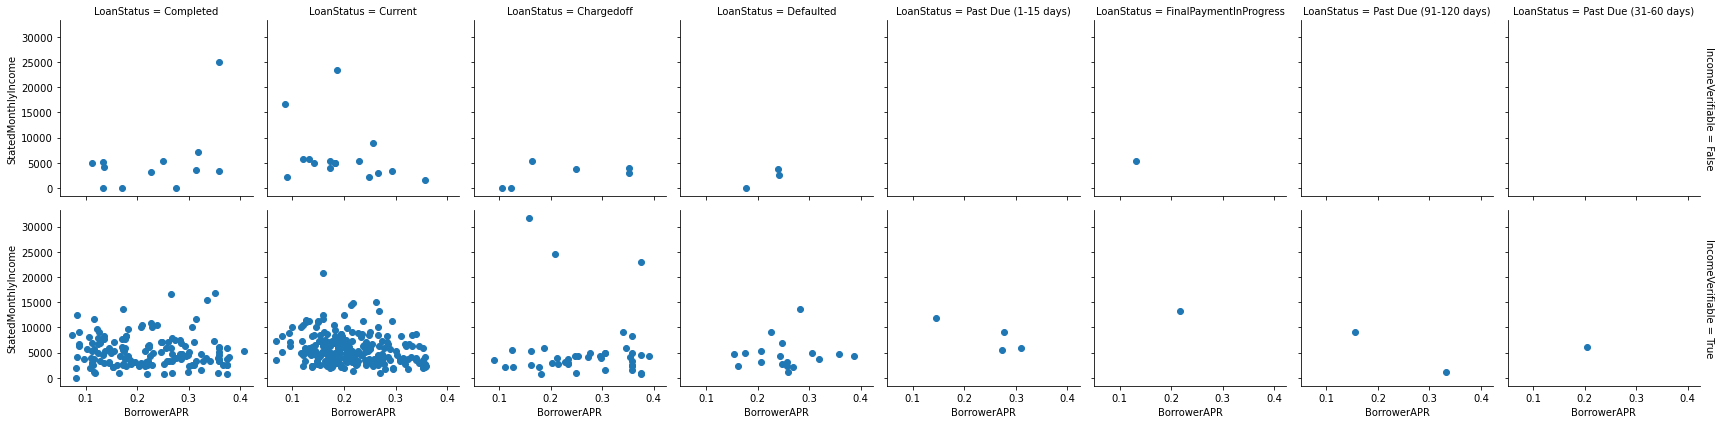

In [48]:
g = sns.FacetGrid(data = loans_clean, col = 'LoanStatus', row = 'IncomeVerifiable',
                margin_titles = True)
g.map(plt.scatter, 'BorrowerAPR', 'StatedMonthlyIncome');

#### Observations: 
We Noticed that for Patients with No Verifiable Income source Charged off and Past Due Loans had mostly higher BorrowerAPR mean while for patients with a Verifiable Income source we noticed that Past due and defaulted loans higher had BorrowerAPR

#### Visualization

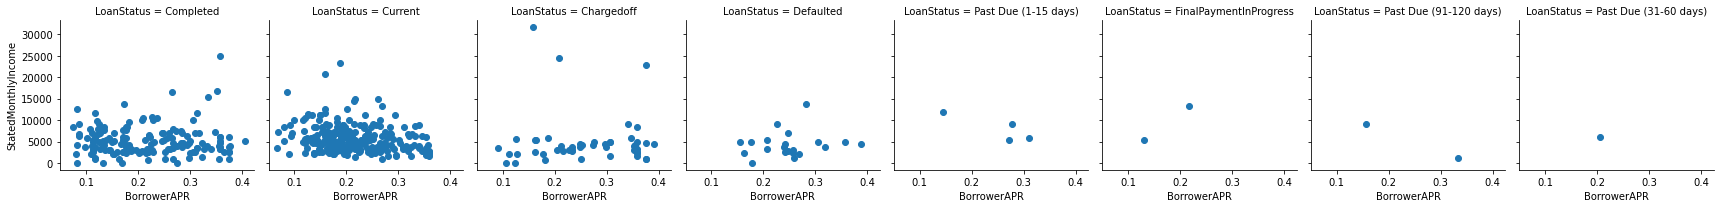

In [49]:
g = sns.FacetGrid(data = loans_clean, col = 'LoanStatus',height=3, aspect=1,
                margin_titles = True)
g.map(plt.scatter, 'BorrowerAPR', 'StatedMonthlyIncome');

#### Observations: 
We noticed that on a FacetGrid with only one column we notice that Past due and defaulted loansStatuts Higher had BorrowerAPR

## Conclusions
Form Our Finding we conclude that Factors like `Terms` and `Emplyoment status` don't affect Loan Status mean While Factors Like  `BorrowerAPR` ,`IncomeVerifiable`,`BorrowerRate` Affects the **Loan Stauts**